![keras logo](https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png)

## Από το προηγούμενο εργαστήριο...

In [ ]:
!pip install --upgrade keras
!pip install --upgrade numpy
!pip install --upgrade matplotlib==3.1.3
!pip install --upgrade tensorflow

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.19.4)
     |████████████████████████████████| 13.1MB 230kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.4.0)


In [ ]:
import tensorflow as tf

from keras.initializers import TruncatedNormal
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

x_train=x_train.reshape((x_train.shape[0], 784))
x_test=x_test.reshape((x_test.shape[0], 784))

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


11493376/11490434 [==============================] - 0s 0us/step



### Πολυεπίπεδα Νευρωνικά Δίκτυα

Θα επεκτείνουμε τον ταξινομητή μας δουλεύοντας στο Κeras, προσθέτοντάς του δύο κρυφά επίπεδα.

![](http://cs231n.github.io/assets/nn1/neural_net2.jpeg)


Το πρώτο κρυφό επίπεδο θα έχει 100 νευρώνες και το δεύτερο 30. Η συνάρτηση ενεργοποίησης των νευρώνων των κρυφών επιπέδων θα είναι η  [σιγμοειδής](https://en.wikipedia.org/wiki/Sigmoid_function):

$$
sigmoid \left( z \right) = \frac{1}{1 + e^{-z}}
$$

Τα υπόλοιπα (επίπεδο εξόδου, συνάρτηση κόστους, τεχνική βελτιστοποίησης) θα τα αφήσουμε ίδια με πριν. Επίσης, όπως αναφέραμε και στο προηγούμενο εργαστήριο, για να μην "κολλήσει" η εκπαίδευση σε κάποιο τοπικό ελάχιστο, δε θα αρχικοποιήσουμε τα βάρη σε μηδενικές τιμές αλλά με την χρήση της truncated normal (με μέση τιμή $0$), θα πάρουμε τιμές στο εύρος $(-2\sigma,+2\sigma)$, όπου $\sigma$ η τυπική απόκλιση.

#### Ακολουθιακή διεπαφή

__1ος τρόπος__: Χρήση της μεθόδου *add()*

In [ ]:
mlp = Sequential()

mlp.add(Dense(100, activation='sigmoid', kernel_initializer=TruncatedNormal(stddev=0.1), bias_initializer='zeros', input_shape=(784,)))
mlp.add(Dense(30, activation='sigmoid', kernel_initializer=TruncatedNormal(stddev=0.1), bias_initializer='zeros'))
mlp.add(Dense(10, activation='softmax', kernel_initializer=TruncatedNormal(stddev=0.1), bias_initializer='zeros'))

Σε αντίθεση με το tensorflow, δεν χρειάζεται να ορίσουμε σχέσεις μεταξύ των επιπέδων (εκτός από το μέγεθος του τανυστή εισόδου), ούτε να αρχικοποιήσουμε τις μεταβλητές. Αυτά, αναλαμβάνει να τα συναγάγει το ίδιο το framework (όπως και να καθορίσει το μέγεθος της εξόδου)!


__2ος τρόπος__: Όρισμα στην κλάση *Sequential*

Μπορούμε να ορίσουμε όλη την αρχιτεκτονική ως όρισμα της Sequential, δηλαδή με μια εντολή της Python! Πέρα από την οικονομία σε γραμμές κώδικα, το μοντέλο μας είναι ευανάγνωστο με "φυσικό" (δηλαδή άμεσα κατανοητό από τον άνθρωπο) τρόπο


In [ ]:
mlp = Sequential([
    Dense(100, activation='sigmoid', kernel_initializer=TruncatedNormal(stddev=0.1), bias_initializer='zeros', input_shape=(784,)),
    Dense(30, activation='sigmoid', kernel_initializer=TruncatedNormal(stddev=0.1), bias_initializer='zeros'),
    Dense(10, activation='softmax', kernel_initializer=TruncatedNormal(stddev=0.1), bias_initializer='zeros')
])
mlp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_12 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


Καθορισμός παραμέτρων εκπαίδευσης και εκπαίδευση του μοντέλου

In [ ]:
epochs=100
mlp.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_hist = mlp.fit(x_train, y_train, epochs=epochs, batch_size=128)

Epoch 1/100
469/469 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1286
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2878 - accuracy: 0.1281
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2773 - accuracy: 0.1700
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2652 - accuracy: 0.1905
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2491 - accuracy: 0.2327
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2278 - accuracy: 0.3480
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 2.1955 - accuracy: 0.3837
Epoch 8/100
469/469 [==============================] - 2s 3ms/step - loss: 2.1482 - accuracy: 0.4679
Epoch 9/100
469/469 [==============================] - 2s 3ms/step - loss: 2.0770 - accuracy: 0.4884
Epoch 10/100
469/469 [==============================] - 2s 3ms/step - loss: 1.9785 - accura

Σχεδιάζουμε τη συνάρτηση κόστους και την ακρίβεια ανά εποχή εκπαίδευσης

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'Accuracy')

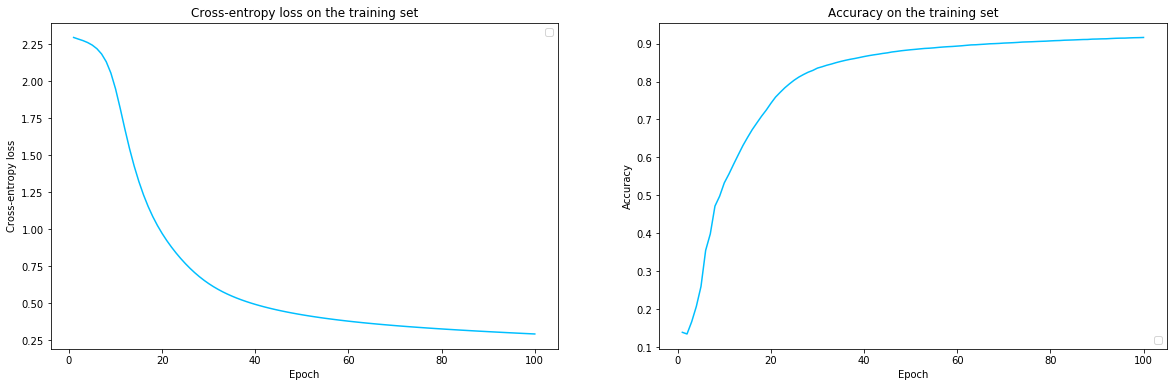

In [ ]:
plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1), mlp_hist.history['loss'], c='deepskyblue')
plt.legend()
plt.title('Cross-entropy loss on the training set')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy loss')
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1), mlp_hist.history['accuracy'], c='deepskyblue')
plt.legend(loc='lower right')
plt.title('Accuracy on the training set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Όπως παρατηρήσαμε και στο προηγούμενο εργαστήριο, η προσθήκη ενός κρυφού επιπέδου **βελτίωσε την απόδοση** του συστήματος, αλλά πλέον χρειάζεται  **περισσότερο χρόνο** για να εκπαιδευτεί γιατί το μοντέλο έχει πολλές περισσότερες παραμέτρους και γιατί συνακόλουθα χρειάζεται και περισσότερες εποχές.

Ας υπολογίσουμε (και εμφανίσουμε) την απόδοσή του στο σύνολο ελέγχου

In [ ]:
mlp_loss, mlp_acc = mlp.evaluate(x_test, y_test)

print('\nΣυνάρτηση κόστους: \t{:.2f}\nΑκρίβεια:\t\t{:.2f}%'.format(mlp_loss, 100*mlp_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.2885 - accuracy: 0.9188

Συνάρτηση κόστους: 	0.29
Ακρίβεια:		91.88%


#### Συναρτησιακή διεπαφή

In [ ]:
inputs = Input(shape=(784,))

l1 = Dense(100, activation='sigmoid', kernel_initializer=TruncatedNormal(stddev=0.1), bias_initializer='zeros')(inputs)
l2 = Dense(30, activation='sigmoid', kernel_initializer=TruncatedNormal(stddev=0.1), bias_initializer='zeros')(l1)
predictions = Dense(10, activation='softmax', kernel_initializer=TruncatedNormal(stddev=0.1), bias_initializer='zeros')(l2)

mlp_func = Model(inputs=inputs, outputs=predictions)
mlp_func.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

hist_mlp_func = mlp_func.fit(x_train, y_train, epochs=epochs, batch_size=128)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3038 - accuracy: 0.1145
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2897 - accuracy: 0.1255
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2806 - accuracy: 0.1790
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2691 - accuracy: 0.1743
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2545 - accuracy: 0.2744
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2328 - accuracy: 0.2919
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2012 - accuracy: 0.3272
Epoch 8/100
469/469 [==============================] - 2s 3ms/step - loss: 2.1561 - accuracy: 0.3355
Epoch 9/100
469/469 [==============================] - 2s 3ms/step - loss: 2.0873 - accuracy: 0.3831
Epoch 10/100
469/469 [==============================] - 2s 3ms/step - loss: 1.9962 - accura

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'Accuracy')

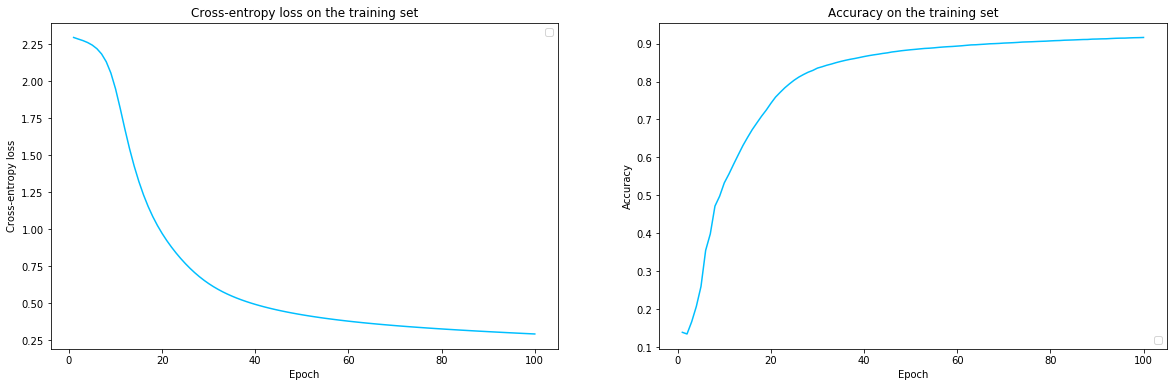

In [ ]:
plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1), mlp_hist.history['loss'], c='deepskyblue')
plt.legend()
plt.title('Cross-entropy loss on the training set')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy loss')
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1), mlp_hist.history['accuracy'], c='deepskyblue')
plt.legend(loc='lower right')
plt.title('Accuracy on the training set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [ ]:
mlp_func_loss, mlp_func_acc = mlp_func.evaluate(x_test, y_test)

print('\nΣυνάρτηση κόστους: \t{:.2f}\nΑκρίβεια:\t\t{:.2f}%'.format(mlp_func_loss, 100*mlp_func_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.2843 - accuracy: 0.9172

Συνάρτηση κόστους: 	0.28
Ακρίβεια:		91.72%



## Συνελικτικά Δίκτυα

Τη σημασία και τη λειτουργία των συνελικτικών δικτύων τη συζητήσαμε επίσης στο  εργαστήριο εισαγωγής στο tensorflow. Τώρα θα δούμε πως αυτά υλοποιούνται με τις δύο διεπαφές του keras, την ακολουθιακή και τη συναρτησιακή διεπαφή.

Αρχικά θα μετατρέψουμε τις εικόνες από διανύσματα $1\times784$ σε πίνακες $28\times28\times1$ pixels για να μπορέσουμε να τις τροφοδοτήσουμε στο συνελικτικό δίκτυο

In [ ]:
print('Πριν: ', x_train.shape, x_test.shape)

x_train=x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test=x_test.reshape((x_test.shape[0], 28, 28, 1))

print('Μετά: ', x_train.shape, x_test.shape)

Πριν:  (60000, 784) (10000, 784)
Μετά:  (60000, 28, 28, 1) (10000, 28, 28, 1)


Στη συνέχεια θα φτιάξουμε ένα συνελικτικό δίκτυο, όμοιο με αυτό του εργαστηρίου εισαγωγής στο tensorflow. Θα αποτελείται δηλαδή από:
1. Ένα επίπεδο συνέλιξης μεγέθους $6\times6$, βάθους $32$ και συνάρτησης ενεργοποίησης *relu*, ακολουθούμενο από ενα επίπεδο συγκέντρωσης μεγίστου $2\times2$
2. Ένα επίπεδο συνέλιξης μεγέθους $5\times5$, βάθους $64$ και συνάρτησης ενεργοποίησης *relu*,  ακολουθούμενο από ενα επίπεδο συγκέντρωσης μεγίστου $2\times2$
3. Τέλος ένα πλήρως διασυνδεδεμένο επίπεδο εξόδου συνάρτησης ενεργοποίησης *softmax*

Για δισδιάστατα δεδομένα, τα επίπεδο συνέλιξης υλοποιούνται από την κλάση *Conv2D*  του module [Convolutional Layers](https://keras.io/layers/convolutional/) και το επίπεδο συγκέντρωσης μεγίστου από την κλάση *MaxPooling2D*  του module [Pooling Layers](https://keras.io/layers/pooling/)

[ConvNet Layers](http://cs231n.github.io/convolutional-networks/#layers)

### Ακολουθιακή διεπαφή

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(6, 6), activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2, 2), padding='same'), 
    Conv2D(64, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(1024, activation='relu', kernel_initializer=TruncatedNormal(stddev=0.1), bias_initializer='zeros'),
    Dense(10, activation='softmax', kernel_initializer=TruncatedNormal(stddev=0.1), bias_initializer='zeros')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        1184      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

Ο αλγόρθμος βελτιστοποίησης θα είναι ο [Adam](https://arxiv.org/abs/1412.6980v8) (κλάση AdamOptimizer από το module [Optimizers](https://keras.io/optimizers/ ) με ρυθμό εκμάθησης $\eta=0.0001$. Οι υπόλοιπες παράμετροι της εκπαίδευσης παραμένουν οι ίδιες.

In [ ]:
epochs = 10
model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model_hist = model.fit(x_train, y_train, epochs=epochs, batch_size=128)

Epoch 1/10
469/469 [==============================] - 11s 14ms/step - loss: 0.7004 - accuracy: 0.8064
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0880 - accuracy: 0.9751
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0570 - accuracy: 0.9835
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0427 - accuracy: 0.9876
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0343 - accuracy: 0.9901
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0285 - accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0244 - accuracy: 0.9925
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0212 - accuracy: 0.9942
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0184 - accuracy: 0.9944
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0144 - accur

Σχεδίαση συνάρτηση κόστους και μετρικής απόδοσης κατά την εκπαίδευση

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'Accuracy')

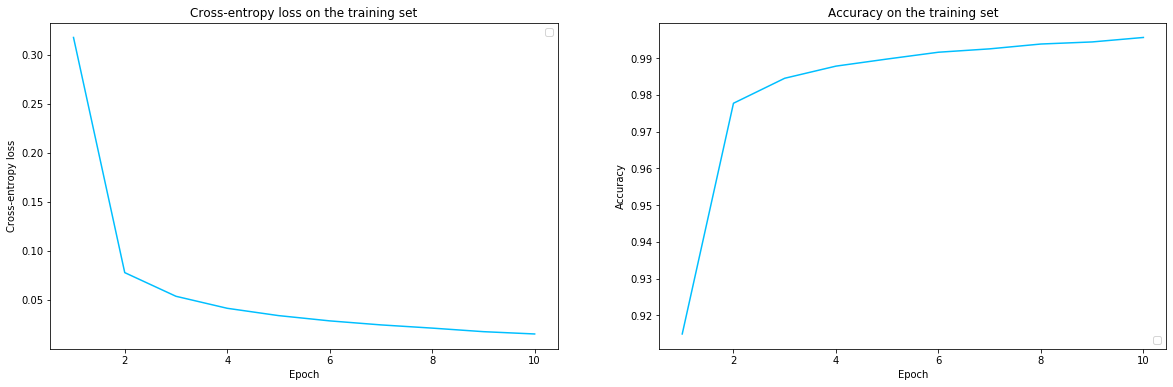

In [ ]:
plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1), model_hist.history['loss'], c='deepskyblue')
plt.legend()
plt.title('Cross-entropy loss on the training set')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy loss')
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1), model_hist.history['accuracy'], c='deepskyblue')
plt.legend(loc='lower right')
plt.title('Accuracy on the training set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Αποτελέσματα στο σύνολο ελέγχου

In [ ]:
model_loss, model_acc = model.evaluate(x_test, y_test)

print('\nΣυνάρτηση κόστους: \t{:.2f}\nΟρθότητα:\t\t{:.2f}%'.format(model_loss, 100*model_acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.0295 - accuracy: 0.9899

Συνάρτηση κόστους: 	0.03
Ορθότητα:		98.99%


### Συναρτησιακή διεπαφή

In [ ]:
inputs = Input((28,28,1),)

l1 = Conv2D(32, kernel_size=(6, 6), activation='relu', padding='same', input_shape=(28,28,))(inputs)
l2 = MaxPooling2D(pool_size=(2, 2), padding='same')(l1)
l3 = Conv2D(64, (5, 5), activation='relu', padding='same')(l2)
l4 = MaxPooling2D(pool_size=(2, 2), padding='same')(l3)
l5 = Flatten()(l4)
l6 = Dense(1024, activation='relu', kernel_initializer=TruncatedNormal(stddev=0.1), bias_initializer='zeros')(l5)
predictions = Dense(10, activation='softmax', kernel_initializer=TruncatedNormal(stddev=0.1), bias_initializer='zeros')(l6)

model_func = Model(inputs=inputs, outputs=predictions)

model_func.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model_func_hist = model_func.fit(x_train, y_train, epochs=epochs, batch_size=128)



Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.6830 - accuracy: 0.8150
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0938 - accuracy: 0.9728
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0612 - accuracy: 0.9818
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0470 - accuracy: 0.9864
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0357 - accuracy: 0.9891
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0292 - accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0251 - accuracy: 0.9924
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0237 - accuracy: 0.9923
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0184 - accuracy: 0.9943
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0164 - accura

In [ ]:
plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1), model_func_hist.history['loss'], c='deepskyblue')
plt.legend()
plt.title('Cross-entropy loss on the training set')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy loss')
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1), model_func_hist.history['accuracy'], c='deepskyblue')
plt.legend(loc='lower right')
plt.title('Accuracy on the training set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [ ]:
model_func_loss, model_func_acc = model_func.evaluate(x_test, y_test)

print('\nΣυνάρτηση κόστους: \t{:.2f}\nΟρθότητα:\t\t{:.2f}%'.format(model_func_loss, 100*model_func_acc))